In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
!pip install keras

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [4]:
model=Sequential()

In [5]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
#test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [6]:
train_data.describe(include="all")

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
train_data.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_data.shape

(42000, 785)

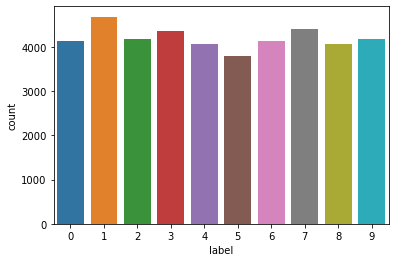

In [9]:
sns.countplot(train_data['label'])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from keras.utils import to_categorical

In [12]:
input_train = train_data.drop('label',axis=1)
output_train=train_data["label"]
output_train=to_categorical(output_train)

In [13]:
output_train.shape

(42000, 10)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(input_train, output_train,test_size=0.20,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.image import ImageDataGenerator

In [16]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#test_data=sc.transform(test_data)

In [17]:
x_train.shape

(33600, 784)

In [18]:
y_train.shape

(33600, 10)

In [19]:
#test_data.shape

In [20]:
#x_test.shape

In [21]:
X_train=x_train.reshape(x_train.shape[0],28,28,1)
X_test=x_test.reshape(x_test.shape[0],28,28,1)
#Test_data=test_data.reshape(test_data.shape[0],28,28,1)

In [22]:
X_train.shape

(33600, 28, 28, 1)

In [23]:
model.add(Conv2D(32, kernel_size=(5,5), padding="same", input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(8420, activation="relu"))
model.add(Dense(2480, activation="relu"))
model.add(Dropout(0.50))
model.add(Dense(units=10, activation="softmax"))


In [24]:
model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=['accuracy'])

In [25]:
datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=False, vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [26]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [27]:
datagen.fit(X_train)
model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), epochs=200, validation_data=test_datagen.flow(X_test,y_test), steps_per_epoch=X_train.shape[0]//50,callbacks=[es,mc])

Epoch 1/200
672/672 [==============================] - 22s 32ms/step - loss: 1.0157 - accuracy: 0.6327 - val_loss: 0.0360 - val_accuracy: 0.9494

Epoch 00001: val_accuracy improved from -inf to 0.94940, saving model to best_model.h5
Epoch 2/200
672/672 [==============================] - 19s 28ms/step - loss: 0.2151 - accuracy: 0.9325 - val_loss: 0.0025 - val_accuracy: 0.9701

Epoch 00002: val_accuracy improved from 0.94940 to 0.97012, saving model to best_model.h5
Epoch 3/200
672/672 [==============================] - 18s 26ms/step - loss: 0.1469 - accuracy: 0.9540 - val_loss: 0.0268 - val_accuracy: 0.9765

Epoch 00003: val_accuracy improved from 0.97012 to 0.97655, saving model to best_model.h5
Epoch 4/200
672/672 [==============================] - 17s 26ms/step - loss: 0.1161 - accuracy: 0.9640 - val_loss: 0.0261 - val_accuracy: 0.9814

Epoch 00004: val_accuracy improved from 0.97655 to 0.98143, saving model to best_model.h5
Epoch 5/200
672/672 [==============================] - 18s 

In [28]:
best_model=load_model('best_model.h5')

In [32]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [39]:
test_data=sc.transform(test_data)
test_data=test_data.reshape(test_data.shape[0],28,28,1)

In [40]:
test_generator = test_datagen.flow(test_data, batch_size=1)

In [42]:
predict = best_model.predict_generator(test_generator, steps=test_data.shape[0]//50, verbose=1)
predict

560/560 [==============================] - 1s 2ms/step


array([[6.6970342e-15, 1.0000000e+00, 7.2482195e-13, ..., 5.1021748e-12,
        8.0534505e-13, 6.0653327e-15],
       [4.9869841e-13, 3.0454458e-11, 2.5195260e-10, ..., 1.3814324e-09,
        5.3809246e-09, 2.6641882e-07],
       [3.1370315e-09, 7.4165346e-10, 1.0400172e-08, ..., 4.9596313e-11,
        9.9999964e-01, 2.3129003e-08],
       ...,
       [2.7793703e-15, 1.5599616e-13, 1.0000000e+00, ..., 9.9455045e-12,
        1.3626009e-14, 3.5919069e-14],
       [2.9514904e-14, 9.4317297e-15, 1.0000000e+00, ..., 2.7082022e-14,
        5.0114476e-15, 1.2499297e-15],
       [1.3158638e-05, 2.3757948e-08, 1.1257685e-08, ..., 4.8727320e-12,
        2.9530611e-08, 1.6595176e-09]], dtype=float32)

In [49]:
predict_class_indices = np.argmax(predict, axis=1)
predict_class_indices.shape

(560,)

In [55]:
ans=[x for x in range(1,561)]
ans

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [59]:
results=pd.DataFrame({"ImageId":ans,
                      "Label":predict_class_indices})

In [60]:
results

,ImageId,Label
0,1,1
1,2,4
2,3,8
3,4,8
4,5,6
...,...,...
555,556,0
556,557,6
557,558,2
558,559,2


In [61]:
results.to_csv("results.csv",index=False)